In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import plotly.express as px

## Exploratory Data Analysis 

In [2]:
# Import the dataset
global_land_temperatures_by_city_df = pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [3]:
# Explore the first 5 enteries of the dataset
global_land_temperatures_by_city_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [4]:
# Explore the datatypes used in the dataset
global_land_temperatures_by_city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [5]:
# View the non-null counts per column
global_land_temperatures_by_city_df.count()

dt                               8599212
AverageTemperature               8235082
AverageTemperatureUncertainty    8235082
City                             8599212
Country                          8599212
Latitude                         8599212
Longitude                        8599212
dtype: int64

In [6]:
# View the amount of missing values
global_land_temperatures_by_city_df.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [7]:
# View Dataset Stats
global_land_temperatures_by_city_df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


## Data Preprocessing

In [8]:
# Convert the dt colunmn to date and time and extract the year
global_land_temperatures_by_city_df['dt'] = pd.to_datetime(global_land_temperatures_by_city_df['dt'])

# Creates a column labeled year
global_land_temperatures_by_city_df['Year'] = global_land_temperatures_by_city_df['dt'].dt.year


In [9]:
# View modified dataset
global_land_temperatures_by_city_df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1743
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744
...,...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E,2013
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E,2013
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E,2013
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E,2013


In [10]:
# Filter the dataset to only use enteries from 1900-2012
filtered_global_land_temperatures_by_city_df = global_land_temperatures_by_city_df[
    (global_land_temperatures_by_city_df['Year'] >= 1900) & (global_land_temperatures_by_city_df['Year'] <= 2012)]

In [11]:
filtered_global_land_temperatures_by_city_df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
1874,1900-01-01,-0.989,0.588,Århus,Denmark,57.05N,10.33E,1900
1875,1900-02-01,-2.799,0.882,Århus,Denmark,57.05N,10.33E,1900
1876,1900-03-01,0.592,0.429,Århus,Denmark,57.05N,10.33E,1900
1877,1900-04-01,4.630,0.417,Århus,Denmark,57.05N,10.33E,1900
1878,1900-05-01,9.576,0.521,Århus,Denmark,57.05N,10.33E,1900
...,...,...,...,...,...,...,...,...
8599198,2012-08-01,18.588,0.224,Zwolle,Netherlands,52.24N,5.26E,2012
8599199,2012-09-01,14.333,0.207,Zwolle,Netherlands,52.24N,5.26E,2012
8599200,2012-10-01,10.358,0.208,Zwolle,Netherlands,52.24N,5.26E,2012
8599201,2012-11-01,6.469,0.189,Zwolle,Netherlands,52.24N,5.26E,2012


In [12]:
# Check for missing values in the newly filtered dataset
filtered_global_land_temperatures_by_city_df.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
Year                             0
dtype: int64

In [13]:
# Create a function to convert Latitude and Longitude to numeric values
def convert_geo_coords(coord):
    # Latitude ends in 'N' or 'S'; Longitude ends in 'E' or 'W'
    if coord[-1] in ['N', 'S']:
        return float(coord[:-1]) * (1 if coord[-1] == 'N' else -1)
    elif coord[-1] in ['E', 'W']:
        return float(coord[:-1]) * (1 if coord[-1] == 'E' else -1)
    return float(coord)

In [14]:
# Convert the geo_coords using the function

filtered_global_land_temperatures_by_city_df['Longitude'] = filtered_global_land_temperatures_by_city_df['Longitude'].apply(convert_geo_coords)

filtered_global_land_temperatures_by_city_df['Latitude'] = filtered_global_land_temperatures_by_city_df['Latitude'].apply(convert_geo_coords)

C:\Users\Eppys\AppData\Local\Temp\ipykernel_18944\1773990511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_global_land_temperatures_by_city_df['Longitude'] = filtered_global_land_temperatures_by_city_df['Longitude'].apply(convert_geo_coords)
C:\Users\Eppys\AppData\Local\Temp\ipykernel_18944\1773990511.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_global_land_temperatures_by_city_df['Latitude'] = filtered_global_land_temperatures_by_city_df['Latitude'].apply(convert_geo_coords)


## Feature Engineering

In [15]:
# Group dataset by city
grouped_cities = filtered_global_land_temperatures_by_city_df.groupby('City')

In [16]:
# Use numpy to create arrays for features to be added to dataset (Average Temperature, Rate of Change, Standard Deviation)

engineered_city_features = []

for city, group in grouped_cities:
    grouped_years = group['Year'].values.reshape(-1,1)
    grouped_average_temperature = group['AverageTemperature'].values
    
    # Fit a linear regression model to extract the sloped and intercept
    linear_regression_model = LinearRegression()
    linear_regression_model.fit(grouped_years, grouped_average_temperature)
    
    rate_of_change = linear_regression_model.coef_[0]
    intercept = linear_regression_model.intercept_
    
    # Features
    average_temperature = np.mean(grouped_average_temperature)
    standard_deviation = np.std(grouped_average_temperature)
    min_temperature = np.min(grouped_average_temperature)
    max_temperature = np.max(grouped_average_temperature)
    temperature_range = max_temperature - min_temperature 
    years_to_1_5_temperature_change = 1.5 / rate_of_change if rate_of_change != 0 else np.nan # in case of divide by zero we will just put NaN
    
    # Add features to list
    engineered_city_features.append(
    {
        'City': city,
        'Country': group['Country'].iloc[0],
        'Latitude': group['Latitude'].iloc[0],
        'Longitude': group['Longitude'].iloc[0],
        'RateOfChange': rate_of_change,
        'AverageCityTemperature': average_temperature,
        'StandardDeviation': standard_deviation,
        'MinTemperature': min_temperature,
        'MaxTemperature': max_temperature,
        'TemperatureRange': temperature_range,
        'YearsUntil1.5TemperatureChange' : years_to_1_5_temperature_change
    })

In [17]:
engineered_features_df = pd.DataFrame(engineered_city_features)
engineered_features_df

,City,Country,Latitude,Longitude,RateOfChange,AverageCityTemperature,StandardDeviation,MinTemperature,MaxTemperature,TemperatureRange,YearsUntil1.5TemperatureChange
0,A Coruña,Spain,42.59,-8.73,0.010225,13.393040,3.856365,5.062,21.913,16.851,146.705257
1,Aachen,Germany,50.63,6.34,0.010910,9.132275,6.191364,-7.720,22.812,30.532,137.483358
2,Aalborg,Denmark,57.05,10.33,0.009922,8.018004,6.369246,-7.816,20.883,28.699,151.178383
3,Aba,Nigeria,5.63,8.07,0.007759,26.786108,1.054214,24.009,30.036,6.027,193.335143
4,Abadan,Iran,29.74,48.00,0.013546,25.237664,8.351773,7.964,38.531,30.567,110.736204
...,...,...,...,...,...,...,...,...,...,...,...
3443,Århus,Denmark,57.05,10.33,0.009922,8.018004,6.369246,-7.816,20.883,28.699,151.178383
3444,Çorlu,Turkey,40.99,27.69,0.007166,13.599576,6.821893,-0.966,26.774,27.740,209.317852
3445,Çorum,Turkey,40.99,34.08,0.007639,10.250976,7.469154,-5.475,24.577,30.052,196.372628
3446,Öskemen,Kazakhstan,50.63,82.39,0.015857,1.611088,13.070158,-28.720,22.229,50.949,94.593668


In [18]:
# Create a function that assigns risk labels to 
engineered_features_df.describe()

,Latitude,Longitude,RateOfChange,AverageCityTemperature,StandardDeviation,MinTemperature,MaxTemperature,TemperatureRange,YearsUntil1.5TemperatureChange
count,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000
mean,22.760305,33.125626,0.009946,17.834648,5.446304,5.922023,27.710032,21.788009,159.982058
std,23.343417,74.235291,0.002476,7.663985,3.538202,14.343447,4.378213,12.822417,39.261050
min,-52.240000,-151.130000,0.004339,-11.514866,0.491174,-42.704000,9.245000,3.178000,78.833984
25%,8.840000,-5.970000,0.008113,11.600276,2.231723,-3.864000,24.766500,9.957000,136.424548
50%,28.130000,36.350000,0.009940,18.603574,5.395297,8.575000,28.001500,21.101000,150.900950
75%,39.380000,100.712500,0.010995,25.399146,8.082391,18.379500,30.201000,30.709250,184.894194
max,69.920000,176.950000,0.019027,29.229099,16.417707,26.027000,39.153000,61.010000,345.709549


In [28]:
# Create a function that assigns risk labels to each city
def assign_climate_risk_label(row):
    rate_of_change = row['RateOfChange']
    average_temperature = row['AverageCityTemperature']
    standard_deviation = row['StandardDeviation']  
    max_temperature = row['MaxTemperature']
    temperature_range = row['TemperatureRange']
    years_to_1_5 = row['YearsUntil1.5TemperatureChange'] 

    if (
        rate_of_change > 0.015 or
        average_temperature > 26 or
        standard_deviation > 10 or
        max_temperature > 34 or
        (pd.notna(years_to_1_5) and years_to_1_5 <= 25)
    ):
        return 'High'

    elif (
        rate_of_change > 0.01 or
        average_temperature > 20 or
        standard_deviation > 6 or
        temperature_range > 25 or
        (pd.notna(years_to_1_5) and years_to_1_5 <= 75)
    ):
        return 'Moderate'

    else:
        return 'Low'

    

In [29]:
engineered_features_df['RiskLabel'] = engineered_features_df.apply(assign_climate_risk_label, axis=1)

Text(0, 0.5, 'Total Cities')

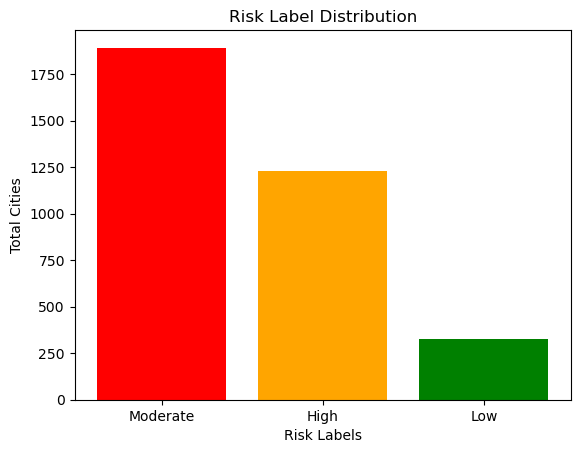

In [32]:
# Plot the label distribution
label_counts = engineered_features_df['RiskLabel'].value_counts()
label_counts
plt.bar(label_counts.index, label_counts.values, color=['Red', 'Orange', 'Green'])
plt.title('Risk Label Distribution')
plt.xlabel('Risk Labels')
plt.ylabel('Total Cities')

## Model Developmet

In [66]:
# Encode the risk labels to 0,1,2
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(engineered_features_df['RiskLabel'])

In [67]:
# Split dataset into trainiing and testing sets
features = engineered_features_df.drop(columns=['City', 'Country', 'RiskLabel'])
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=.4, stratify=target, random_state=42)

In [68]:
# Normalize Features

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [69]:
# LogisticRegression Classifier
logistic_regression_model = LogisticRegression(max_iter=100, class_weight='balanced')

In [70]:
# Parameter grid for GridSearchCv
parameter_grid_logistic_regression = {
     'multi_class': ['multinomial'],
    'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
    'penalty': ['l2', None], # All solvers can accept these penalties (simplicity)
    'C': [0.01, 0.1, 1, 10]
}

In [71]:
# GridSearchCv
grid_search_cv_logistic_regression = GridSearchCV(estimator=logistic_regression_model, param_grid=parameter_grid_logistic_regression, cv=5, n_jobs=-1)

In [72]:
# Fit the model and cross-validate
grid_search_cv_logistic_regression.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'multi_class': ['multinomial'],
                         'penalty': ['l2', None],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']})

In [73]:
# Best params and score
print("Best Parameters:", grid_search_cv_logistic_regression.best_params_)


Best Parameters: {'C': 1, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga'}


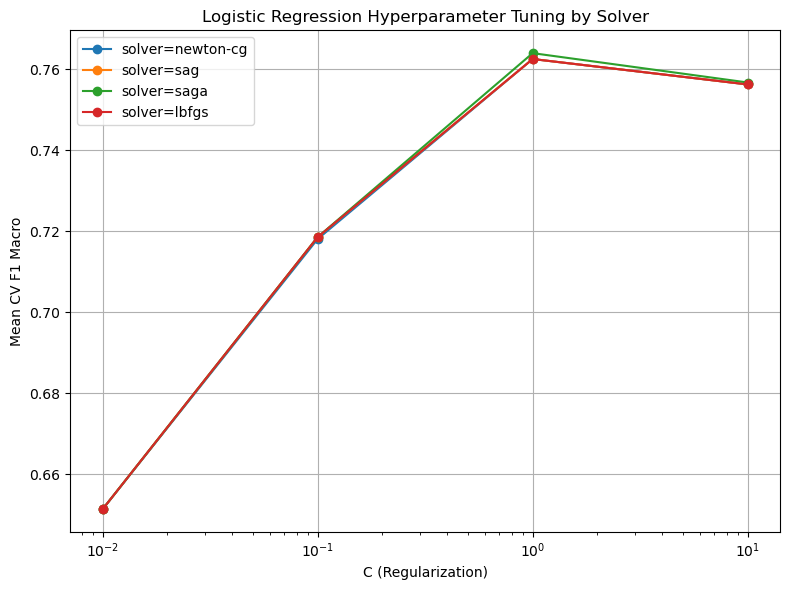

In [74]:
# Hyperparameter tuning plot for logistical regression
logistic_regression_results = grid_search_cv_logistic_regression.cv_results_

solver_scores = defaultdict(list)

for params, score in zip(logistic_regression_results['params'], logistic_regression_results['mean_test_score']):
    if params['multi_class'] == 'multinomial' and str(params['penalty']) == 'l2':
        solver = params['solver']
        C = params['C']
        solver_scores[solver].append((C, score))

# Plot all solvers 
plt.figure(figsize=(8, 6))
for solver, scores in solver_scores.items():
    scores.sort()
    Cs, mean_scores = zip(*scores)
    plt.plot(Cs, mean_scores, marker='o', label=f'solver={solver}')

plt.xscale('log')
plt.xlabel('C (Regularization)')
plt.ylabel('Mean CV F1 Macro')
plt.title('Logistic Regression Hyperparameter Tuning by Solver')
plt.grid(True)
plt.legend()
plt.tight_layout()

In [75]:
# Training vs Tesing
logistic_regression_y_pred_training_data = grid_search_cv_logistic_regression.predict(x_train_scaled)
logistic_regression_y_pred_testing_data = grid_search_cv_logistic_regression.predict(x_test_scaled)

In [78]:
# Classification Report for training and testing 
print('Classification Report for Logistical Regression: Training Set: \n', classification_report(y_train, logistic_regression_y_pred_training_data, target_names=['Low', 'Moderate', 'High']))
print('Classification Report for Logistical Regression: Testing Set: \n', classification_report(y_test, logistic_regression_y_pred_testing_data, target_names=['Low', 'Moderate', 'High']))

Classification Report for Logistical Regression: Training Set: 
               precision    recall  f1-score   support

         Low       0.77      0.88      0.82       736
    Moderate       0.49      0.79      0.60       197
        High       0.86      0.69      0.77      1135

    accuracy                           0.77      2068
   macro avg       0.71      0.79      0.73      2068
weighted avg       0.79      0.77      0.77      2068

Classification Report for Logistical Regression: Testing Set: 
               precision    recall  f1-score   support

         Low       0.72      0.83      0.77       491
    Moderate       0.52      0.82      0.64       132
        High       0.83      0.66      0.73       757

    accuracy                           0.74      1380
   macro avg       0.69      0.77      0.71      1380
weighted avg       0.76      0.74      0.74      1380



In [85]:
# Support Vector Machine
suppor_vector_machine_model = SVC()

In [86]:
# Parameter grid for SVM
parameter_grid_svm = [
    {'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100]},
    {'kernel': ['rbf'], 'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]}
]

In [87]:
#GridSearchCv for SVM
grid_search_cv_svm = GridSearchCV(estimator=suppor_vector_machine_model, param_grid=parameter_grid_svm, cv=5, n_jobs=-1)

In [88]:
# Fit the model using scaled features
grid_search_cv_svm.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']}])

In [89]:
print('Best Params for SVM: ', grid_search_cv_svm.best_params_)

Best Params for SVM:  {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


C:\Users\Eppys\AppData\Local\Temp\ipykernel_18944\1390310012.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

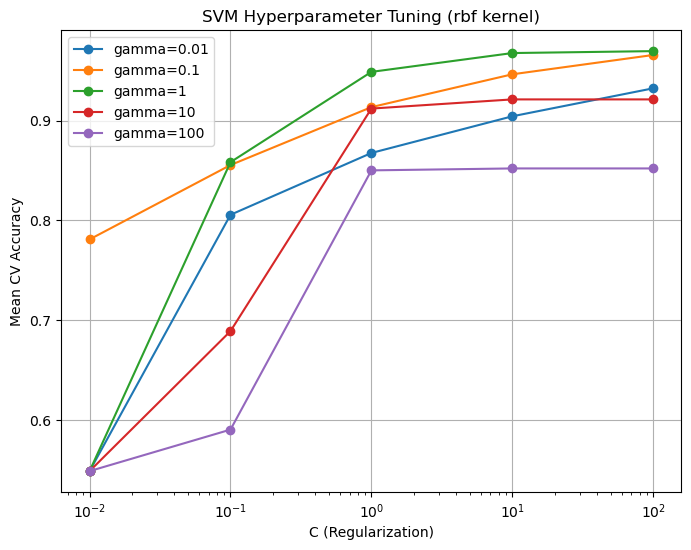

In [90]:
svm_results = grid_search_cv_svm.cv_results_

# Get entries for kernel='rbf'
rbf_results = [
    (params['C'], params['gamma'], score)
    for params, score in zip(svm_results['params'], svm_results['mean_test_score'])
    if params['kernel'] == 'rbf'
]

gamma_scores = defaultdict(list)

for C, gamma, score in rbf_results:
    gamma_scores[gamma].append((C, score))

    plt.figure(figsize=(8, 6))
for gamma, scores in gamma_scores.items():
    scores.sort()  # sort by C
    Cs, accs = zip(*scores)
    plt.plot(Cs, accs, marker='o', label=f'gamma={gamma}')

plt.xscale('log')
plt.xlabel('C (Regularization)')
plt.ylabel('Mean CV Accuracy')
plt.title('SVM Hyperparameter Tuning (rbf kernel)')
plt.legend()
plt.grid(True)

In [92]:
# Training vs  Testing 
svm_y_pred_training_data = grid_search_cv_svm.predict(x_train_scaled)
svm_y_pred_testing_data = grid_search_cv_svm.predict(x_test_scaled)

In [93]:
# Classification Report for training and testing 
print('Classification Report for Support Vector Machine: Training Set: \n', classification_report(y_train, svm_y_pred_training_data, target_names=['Low', 'Moderate', 'High']))
print('Classification Report for Support Vector Machine: Testing Set: \n', classification_report(y_test, svm_y_pred_testing_data, target_names=['Low', 'Moderate', 'High']))

Classification Report for Support Vector Machine: Training Set: 
               precision    recall  f1-score   support

         Low       1.00      1.00      1.00       736
    Moderate       1.00      0.99      1.00       197
        High       1.00      1.00      1.00      1135

    accuracy                           1.00      2068
   macro avg       1.00      1.00      1.00      2068
weighted avg       1.00      1.00      1.00      2068

Classification Report for Support Vector Machine: Testing Set: 
               precision    recall  f1-score   support

         Low       0.98      0.95      0.96       491
    Moderate       0.98      0.96      0.97       132
        High       0.96      0.98      0.97       757

    accuracy                           0.97      1380
   macro avg       0.97      0.96      0.97      1380
weighted avg       0.97      0.97      0.97      1380



In [94]:
# Random Forest
random_forest_model = RandomForestClassifier()

In [97]:
# Parameter grid random forest 
param_grid_random_forest = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [98]:
# GridsearchCv random forest
grid_search_cv_random_forest = GridSearchCV(estimator=random_forest_model, param_grid=param_grid_random_forest, cv=5, n_jobs=-1)

In [99]:
# fit the model
grid_search_cv_random_forest.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]})

In [100]:
print('Best Params for Random Forest: ', grid_search_cv_random_forest.best_params_)

Best Params for Random Forest:  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


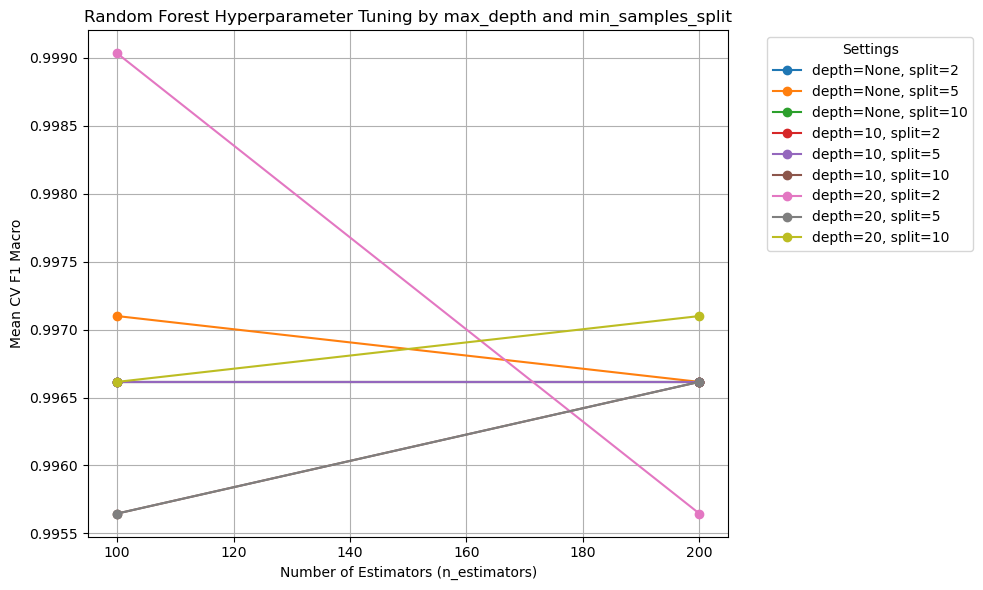

In [101]:
random_forest_results = grid_search_cv_random_forest.cv_results_

# Extract entries grouped by `max_depth`
rf_results = [
    (params['n_estimators'], params['max_depth'], params['min_samples_split'], score)
    for params, score in zip(random_forest_results['params'], random_forest_results['mean_test_score'])
]

# Group scores by max_depth
grouped_scores = defaultdict(list)

for n_estimators, max_depth, min_samples_split, score in rf_results:
    depth = str(max_depth) if max_depth is not None else "None"
    key = f"depth={depth}, split={min_samples_split}"
    grouped_scores[key].append((n_estimators, score))

# Plot
plt.figure(figsize=(10, 6))
for label, scores in grouped_scores.items():
    scores.sort()
    estimators, mean_scores = zip(*scores)
    plt.plot(estimators, mean_scores, marker='o', label=label)

plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean CV F1 Macro')
plt.title('Random Forest Hyperparameter Tuning by max_depth and min_samples_split')
plt.legend(title='Settings', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

In [102]:
# training vs testing data
random_forest_y_pred_training_data = grid_search_cv_random_forest.predict(x_train)
random_forest_y_pred_testing_data = grid_search_cv_random_forest.predict(x_test)

In [103]:
# Classification Report for training and testing 
print('Classification Report for Random Forest: Training Set: \n', classification_report(y_train, random_forest_y_pred_training_data, target_names=['Low', 'Moderate', 'High']))
print('Classification Report for Random Forest: Testing Set: \n', classification_report(y_test, random_forest_y_pred_testing_data, target_names=['Low', 'Moderate', 'High']))

Classification Report for Random Forest: Training Set: 
               precision    recall  f1-score   support

         Low       1.00      1.00      1.00       736
    Moderate       1.00      1.00      1.00       197
        High       1.00      1.00      1.00      1135

    accuracy                           1.00      2068
   macro avg       1.00      1.00      1.00      2068
weighted avg       1.00      1.00      1.00      2068

Classification Report for Random Forest: Testing Set: 
               precision    recall  f1-score   support

         Low       1.00      1.00      1.00       491
    Moderate       1.00      0.98      0.99       132
        High       1.00      1.00      1.00       757

    accuracy                           1.00      1380
   macro avg       1.00      0.99      1.00      1380
weighted avg       1.00      1.00      1.00      1380



In [105]:
features.columns

Index(['Latitude', 'Longitude', 'RateOfChange', 'AverageCityTemperature',
       'StandardDeviation', 'MinTemperature', 'MaxTemperature',
       'TemperatureRange', 'YearsUntil1.5TemperatureChange'],
      dtype='object')

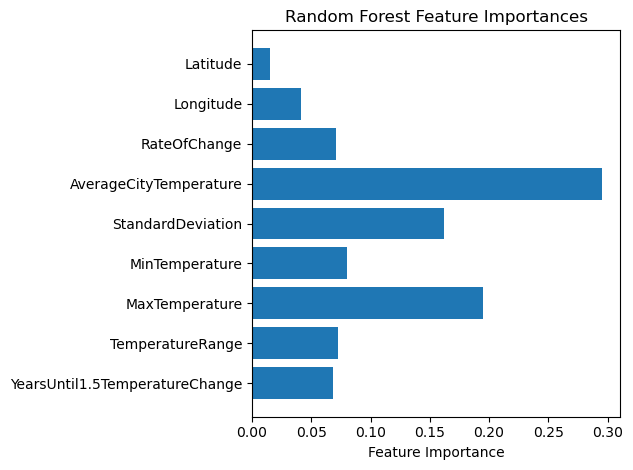

In [106]:
# Feature importance
importances = grid_search_cv_random_forest.best_estimator_.feature_importances_
feature_names = features.columns
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()